In [1]:
# ✅ Test script for WrappedProteinDataset and its visualizations
import numpy as np
import pandas as pd
from project_root.dataset.protein_dataset import ProteinDataset
from project_root.dataset.wrapped_protein_dataset import WrappedProteinDataset

# -------------------------------
# 🔧 Create dummy input data
# -------------------------------
ids = [f"P{i:05d}" for i in range(20)]

df = pd.DataFrame({
    "UniProt IDs": ids,
    "Class": np.random.randint(0, 2, size=20),
    "Max_MBL_CC": np.random.rand(20)
})

embedding_dim = 64
attention_shape = (12, 64)
embeddings = {id_: np.random.rand(embedding_dim) for id_ in ids}
attention_weights = {id_: np.random.rand(*attention_shape) for id_ in ids}

In [2]:
# -------------------------------
# ✅ Build ProteinDataset
# -------------------------------
dataset = ProteinDataset(df, embeddings, attention_weights, solve_inconsistencies=True)

# -------------------------------
# ✅ Build WrappedProteinDataset with PCA
# -------------------------------
wrapped = WrappedProteinDataset(
    dataset=dataset,
    reduce_method='pca',
    pca_method='threshold',
    threshold=0.90,
    random_projection_dim=256
)


Checking consistency...
 - DataFrame IDs: 20
 - Embeddings IDs: 20
 - Attention Weights IDs: 20
Consistency checked.

ProteinDataset Report:
 - Number of samples: 20
 - Number of embeddings: 20
 - Number of attention weights: 20
 - Target column: Class
 - ID column: UniProt IDs
 - Save path: ./OUTPUTS/

Converting embeddings and attention weights to NumPy arrays...
Applying random projection to reduce attention weights from 768 to 256 dimensions...
Applying dimensionality reduction using pca...


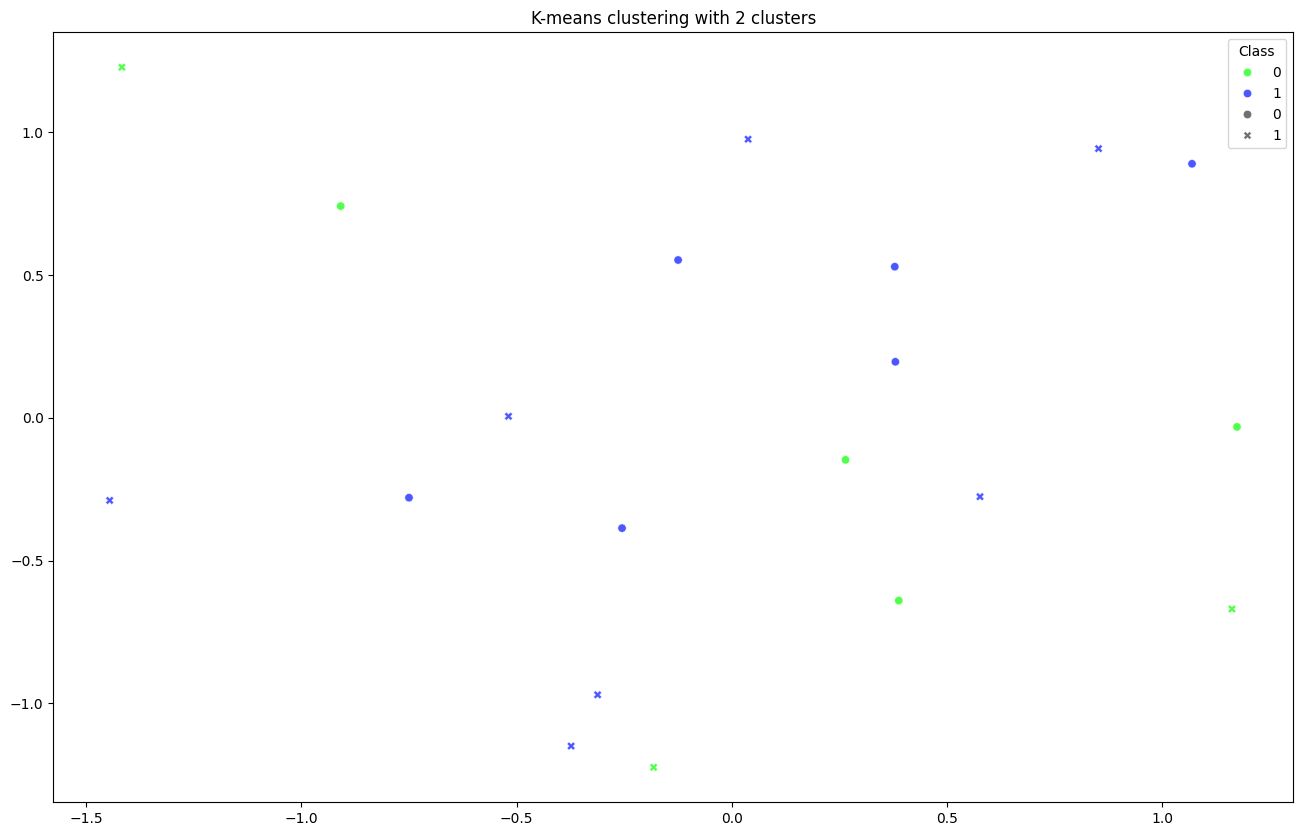

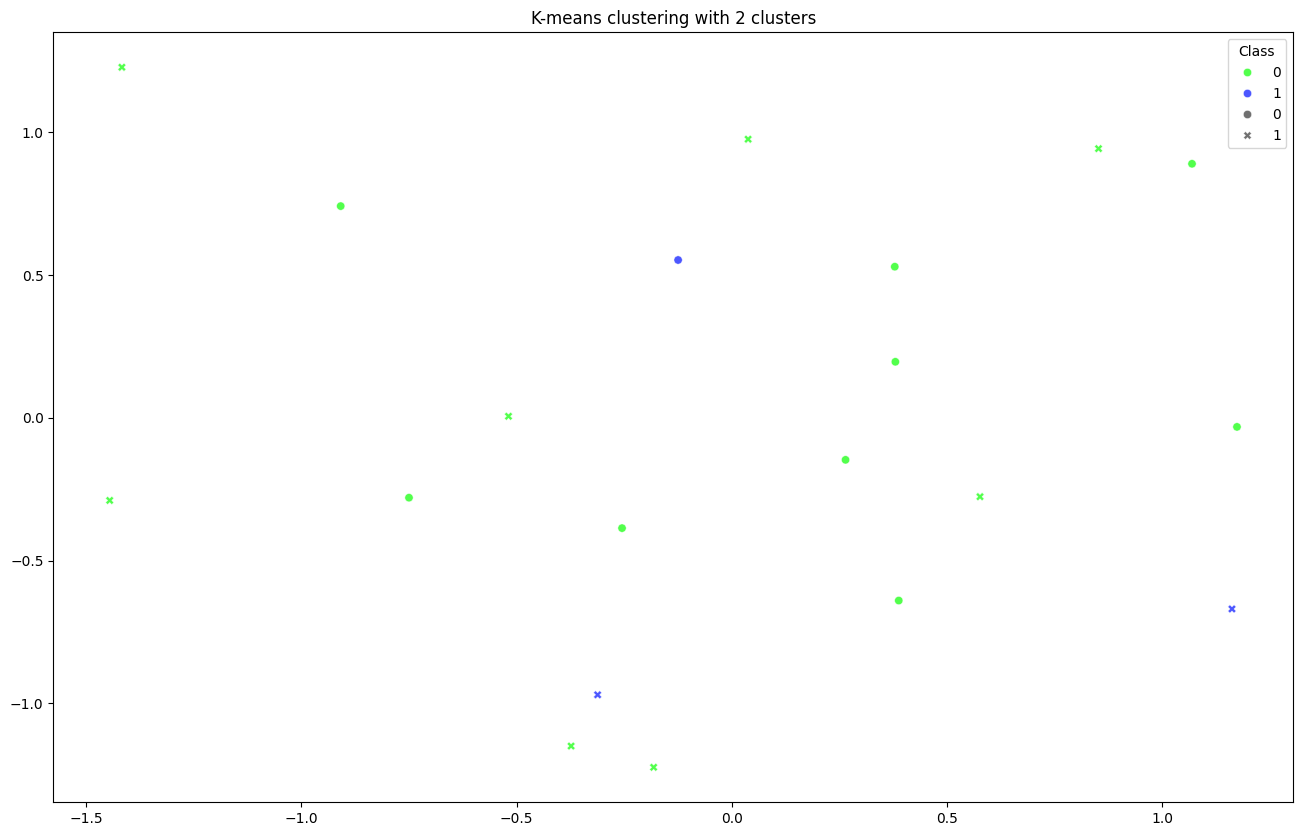

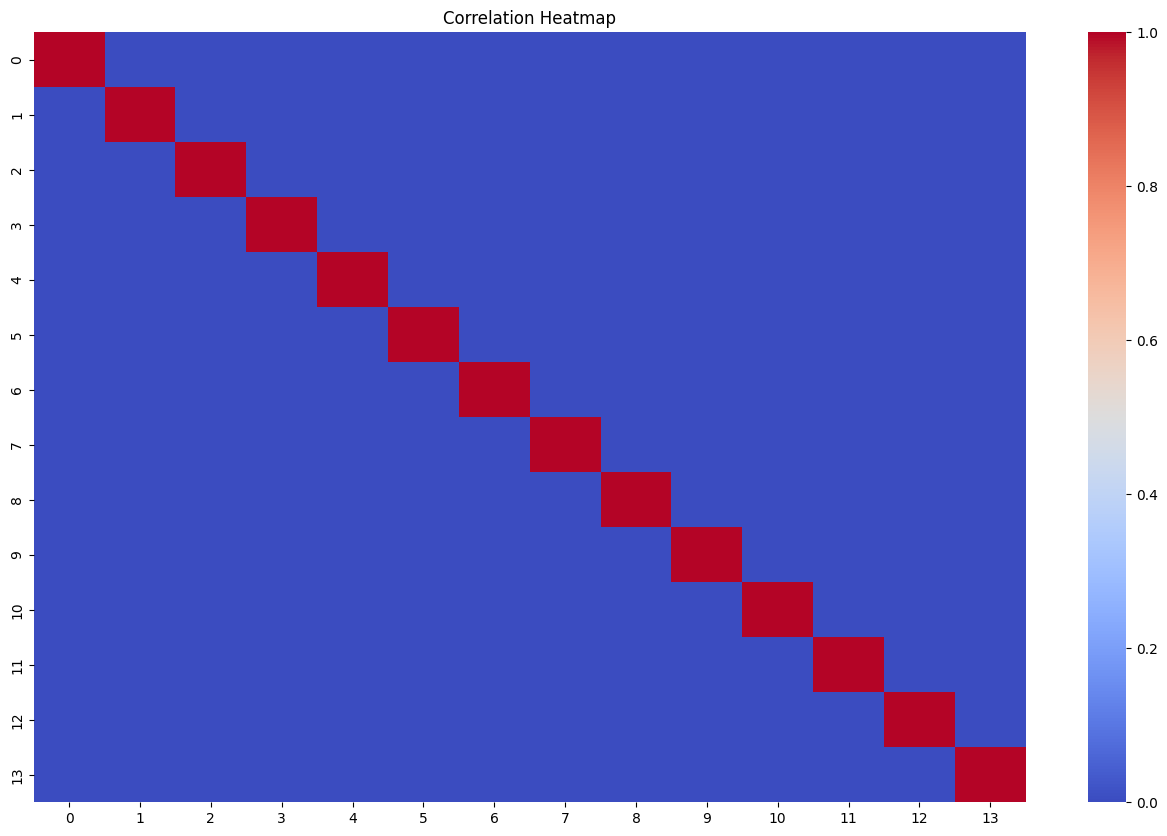

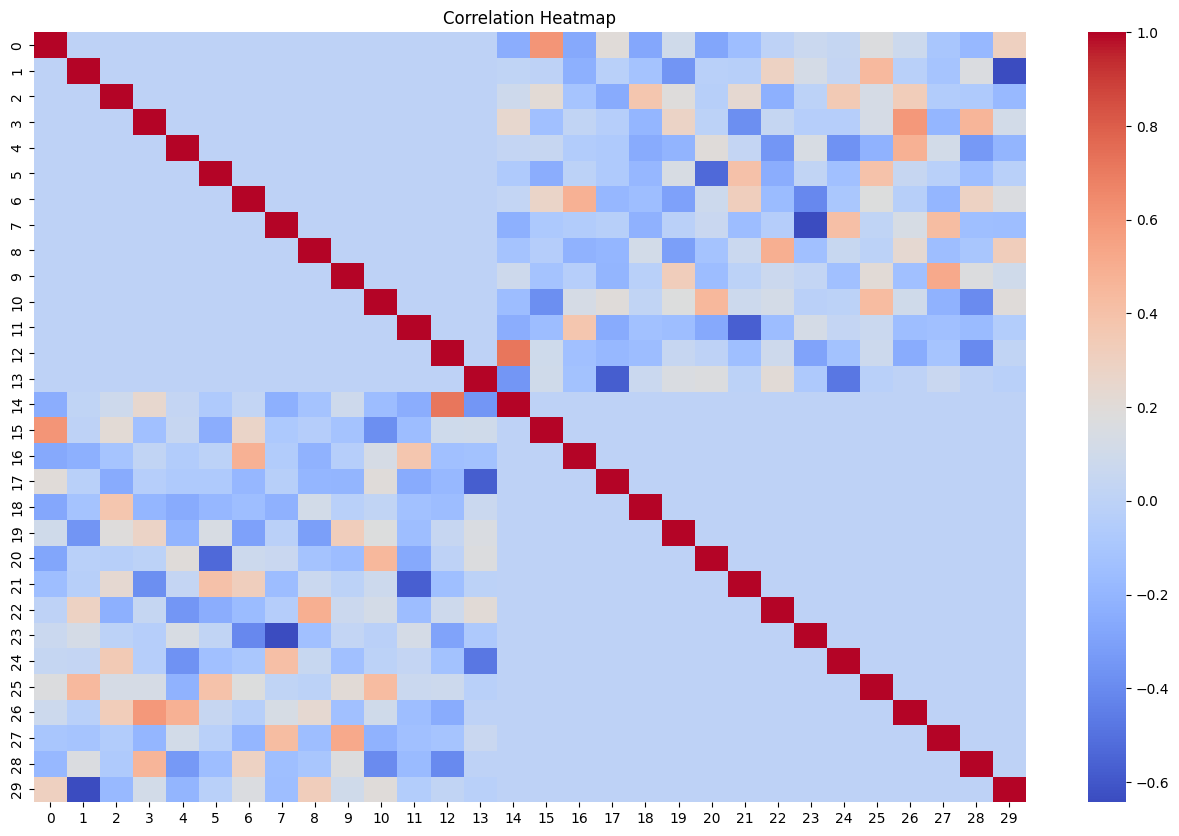

✅ WrappedProteinDataset test complete.


In [3]:
# -------------------------------
# 🔍 Run visualizations
# -------------------------------
wrapped.plot_kmeans(n_clusters=2, attribute='Class', embedding=True, attention_weights=False)
wrapped.plot_kmeans(n_clusters=2, attribute='Class', embedding=True, attention_weights=True)
wrapped.plot_correration_heatmap(embedding=True, attention_weights=False)
wrapped.plot_correration_heatmap(embedding=True, attention_weights=True)

print("✅ WrappedProteinDataset test complete.")